## Matricule & noms :
- Jalal Muhammad 2153171
- Mounir Chentouf 2274895

### <center> ELE8812 - Traitement et analyse d'images </center>
<center> Travail practique No. 1 </center>
<center>Hiver 2026 </center>

<div class="alert alert-block alert-danger">
Ce <a href="https://realpython.com/matlab-vs-python/"> lien</a> vous permettra de voir les différences fondamentales entre Python et Matlab. Ne passez pas forcement par les étapes d'installation.
</div>

L’objet de ce travail est de mettre en pratique certains des traitements élémentaires dans le domaine spatial qui ont été présentés en cours, tout en permettant une familiarisation avec Python et ses outils de traitement d’images. Trois points seront abordés :
1. Les transformations géométriques
2. Le débruitage par filtrage dans le domaine spatial
3. L’amélioration d’images par manipulation d’histogramme et masque flou

Les fonctions et les données à utiliser pour effectuer ce travail pratique se trouvent
dans l’archive ZIP de ce TP disponible sur le site web du cours.

**Pondération**
- Transformations géométriques : 6 pts
- Débruitage par filtrage spatial : 6 pts
- Amélioration d’images : 6 pts
- Qualités de la langue et du rapport : 2 pts
- Total : 20 points

**Date de remise**
- Groupe 1: 2 février 23h59
- Groupe 2: 9 février 23h59

##  1. Transformations géométriques (6 pts)

L’interpolation est un élément central de toute transformation géométrique d’image.
L’objet de cette question est de mettre en œuvre une forme élémentaire d’interpolation et
de l’utiliser dans une transformation géométrique particulièrement simple : le changement
d’échelle d’une image à l’aide d’une interpolation par plus proche voisin.
![image.png](attachment:image.png)

<div class="alert alert-block alert-info">


La cellule ci dessous effectue des <code>import</code> cela s'assimile a un<code>addpath</code> en matlab. Le but est d'amener des fonctions extérieures (packages) dans le notebook afin que Python les reconnaisse.  
<code> import package as pkg</code> permet de raccourcir le nom de ce dernier. Les fonctions contenues dans 'package' seront alors appelées ainsi <code>pkg.function()</code><br>
    
Vous pouvez chercher sur google chacun des package appelés ci-dessous afin d'obtenir leur documentation.<br>

N'oubliez pas de relancer cette cellule si jamais vous redemarrez le Kernel !!
</div>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
%matplotlib inline
import cv2
import numpy as np
plt.rcParams["figure.figsize"] = (12, 10)


### 1.1. Fonction de changement d’échelle (3 pts)
<div class="alert alert-block alert-warning">
Développez une fonction définie comme suit. <br>

- Indiquez la manière dont vous définissez les coordonnées de l’origine de chaque pixel d’une image (ex : au centre du pixel, dans le coin supérieur gauche …)

- Décrivez chacune des étapes vous permettant de passer de l’image im à l’image ims.

<b>Remarque</b> : Dans la fonction mae_ppv que vous développerez, vous ne devez pas utiliser
les fonctions d’interpolation existantes. Par contre, vous pouvez vous inspirer de la fonction mae_bil.m qui implémente une interpolation bilinéaire.
    </div>

In [2]:
# Inscrivez votre code ici
# Compléter la fonction suivante faisant de l'interpolation par plus proche voisin.
def mae_ppv(im, sc):
    """ Interpolation par plus proche voisin d'une image im.
    im (nd.array): Image à interpoler.
    sc (float): Facteur d'échelle.

    Return:
        nd.array: Image interporlée.
    """
    if sc <= 0 :
        print("sc doit être > 0")
        return
    if np.ndim(im) != 2 :
        raise ValueError("im doit être une image 2D")

    M, N = im.shape

     # Nouvelles dimensions de l'image
    Ms, Ns = [round(M * sc), round(N * sc)]
     # Grille des indices de l'image de sortie
    is_, js_ = np.meshgrid(np.arange(Ms), np.arange(Ns), indexing="ij")

    # Coordonnées (centres) dans la sortie
    ys = is_ + 0.5
    xs = js_ + 0.5

    # Coordonnées correspondantes (centres) dans l'entrée
    y = ys / sc
    x = xs / sc

    # Indices PPV (en entrée), selon la convention centre (i+0.5, j+0.5)
    i = np.rint(y - 0.5).astype(int)
    j = np.rint(x - 0.5).astype(int)

    # bords
    i = np.clip(i, 0, M - 1)
    j = np.clip(j, 0, N - 1)

    return im[i, j]

Pour obtenir l’image redimensionnée ims à partir de l’image d’entrée im, la première étape consiste à récupérer les dimensions de l’image d’origine. L’image de départ peut être vue comme une matrice de taille M × N, composée de M lignes et de N colonnes. On applique ensuite le facteur d’échelle sc afin de déterminer les dimensions de l’image en sortie. L’image de sortie a pour dimensions Ms et Ns. On construit ensuite une grille de pixels correspondant à l’image après redimensionnement. Pour chaque pixel de l’image de sortie, on associe des coordonnées spatiales définies au centre de ce pixel. Pour retrouver la position correspondante dans l’image d’origine, il suffit de diviser ces coordonnées par le facteur d’échelle sc. La valeur du pixel dans l’image d’entrée est alors estimée par interpolation au plus proche voisin, en prenant le pixel dont le centre est le plus près des coordonnées obtenues après reprojection. Pour terminer, un traitement des bords est appliqué afin de vérifier que les indices restent dans un intervalle valide, puis la valeur calculée est affectée au pixel correspondant dans l’image de sortie ims.

In [3]:
def mae_bil(im, sc):
    """ Interpolation bilinéaire d'une image im.
    im (nd.array): Image à interpoler.
    sc (float): Facteur d'échelle.

    Return:
        nd.array: Image interporlée.
    """

    if sc <= 0 :
        display('scale : le parametre d echelle doit etre > 0')
        return


    if np.ndim(im) != 2 :
        display('Image doit avoir 2 dimensions')
        return

    M, N = im.shape
    # Nouvelles dimensions de l'image
    Ms, Ns = [round(M * sc), round(N * sc)]

    xs = np.linspace(1, Ms, Ms)
    ys = np.linspace(1, Ns, Ns)

    xsp = xs * M / Ms
    ysp = ys * N / Ns

    # Ajouter un pixel autour car il faut interpoler les pixels sur les bords
    Ap = np.pad(im, 1, 'symmetric')

    # Extraire les nouvelles coordonnées de l'image
    xisp = np.floor(xs * M / Ms).astype(int)
    yisp = np.floor(ys * N / Ns).astype(int)

    [Xsp, Ysp] = np.meshgrid(xsp,ysp)
    Xsp = np.transpose(Xsp)
    Ysp = np.transpose(Ysp)

    Xfsp = Xsp - np.floor(Xsp) # Coefficients pour l'interpolation
    Yfsp = Ysp - np.floor(Ysp)

    # Interpolation bilinéaire
    ims = (1 - Xfsp) * (1 - Yfsp) * Ap[xisp, :][:, yisp] + \
          Xfsp * (1-Yfsp) * Ap[xisp + 1, :][:, yisp] + \
          (1 - Xfsp) * Yfsp * Ap[xisp, :][:, yisp + 1] + \
          Xfsp * Yfsp * Ap[xisp + 1, :][:, yisp + 1]

    return ims

### 1.2. Effet de l’interpolation (3 pts)
<div class="alert alert-block alert-warning">

- Pour mettre en évidence l’effet de l’interpolation, utilisez la fonction que vous avez
développée pour changer l’échelle de l’image Barbara.tif d’un facteur α
inférieur à 1. Utilisez ensuite la même fonction et un facteur de 1/ α pour la ramener
l’image transformée à son échelle initiale.
  </div>

In [5]:
from google.colab import files
uploaded = files.upload()


Saving Barbara.tif to Barbara.tif


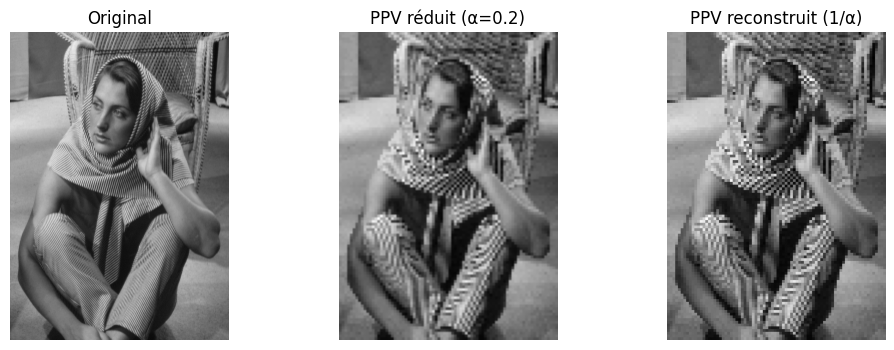

In [6]:
# Inscrivez votre code ici

im_color = cv2.imread('/content/Barbara.tif')
im = cv2.cvtColor(im_color, cv2.COLOR_BGR2GRAY) if im_color.ndim == 3 else im_color
alpha = 0.2
im_inter_nearest = mae_ppv (im, alpha)

im_inter_back_nearest = mae_ppv (im_inter_nearest, 1/alpha)


# Affichage
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.title("Original"); plt.imshow(im, cmap="gray"); plt.axis("off")
plt.subplot(1,3,2); plt.title(f"PPV réduit (α={alpha})"); plt.imshow(im_inter_nearest, cmap="gray"); plt.axis("off")
plt.subplot(1,3,3); plt.title("PPV reconstruit (1/α)"); plt.imshow(im_inter_back_nearest, cmap="gray"); plt.axis("off")
plt.show()

<div class="alert alert-block alert-warning">


- Effectuez les mêmes opérations avec la fonction mae_bil,
qui utilise une interpolation bilinéaire.
  </div>

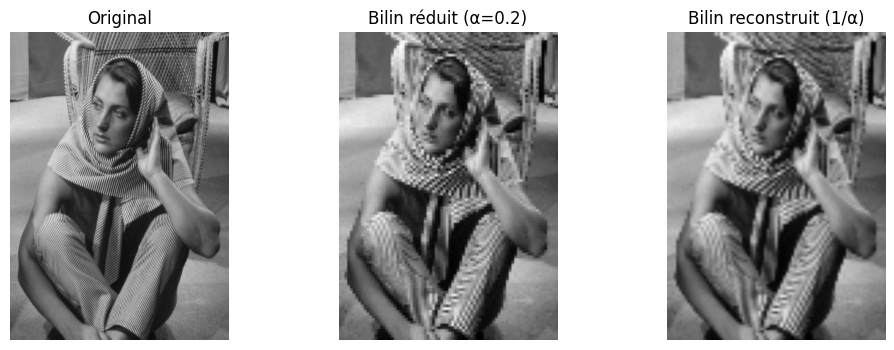

In [7]:
# Inscrivez votre code ici

im_float = im.astype(np.float32)

im_inter_bil = mae_bil(im_float, alpha)
im_inter_back_bil = mae_bil (im_inter_bil, 1/alpha)

# Affichage
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.title("Original"); plt.imshow(im, cmap="gray"); plt.axis("off")
plt.subplot(1,3,2); plt.title(f"Bilin réduit (α={alpha})"); plt.imshow(im_inter_bil, cmap="gray"); plt.axis("off")
plt.subplot(1,3,3); plt.title("Bilin reconstruit (1/α)"); plt.imshow(im_inter_back_bil, cmap="gray"); plt.axis("off")
plt.show()

<div class="alert alert-block alert-warning">

- Qu’observez-vous ? Est-ce que les deux schémas d’interpolation permettent de
reproduire fidèlement l’image originale ? À quoi sont dues les différences
observées ? Pour répondre à cette question, vous pouvez calculer l’erreur
quadratique moyenne entre les images.

\begin{equation*}
\Delta Q = \frac 1 n  \sum_{i,j}\left( I \left( i,j \right) - I' \left( i,j \right) \right)^2
\end{equation*}


Où n est le nombre de pixel dans l’image, 𝐼(𝑖,𝑗) est un pixel de l’image original et
𝐼’(𝑖,𝑗) est le pixel correspondant dans l’image transformée. Vous pouvez aussi
observer l’histogramme des différences d’intensité entre les images.

 </div>


ΔQ  - PPV : 792.179
ΔQ  - Bilinéaire : 480.449


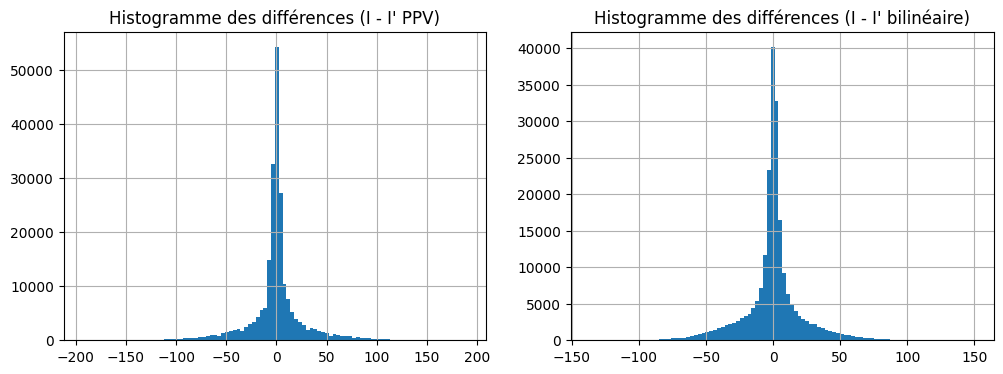

In [8]:


# Forcer une taille commune
M = min(im.shape[0], im_inter_back_nearest.shape[0], im_inter_back_bil.shape[0])
N = min(im.shape[1], im_inter_back_nearest.shape[1], im_inter_back_bil.shape[1])

I = im[:M, :N].astype(np.float32)
Ipp = im_inter_back_nearest[:M, :N].astype(np.float32)
Ibl = im_inter_back_bil[:M, :N].astype(np.float32)

# Différences et ΔQ (MSE)
diff_ppv = I - Ipp
diff_bil = I - Ibl

n = I.size  # nombre de pixels

deltaQ_ppv = (1/n) * np.sum(diff_ppv**2)  # ΔQ selon l'énoncé
deltaQ_bil = (1/n) * np.sum(diff_bil**2)

print(f"ΔQ  - PPV : {deltaQ_ppv:.3f}")
print(f"ΔQ  - Bilinéaire : {deltaQ_bil:.3f}")

# Histogrammes
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title("Histogramme des différences (I - I' PPV)")
plt.hist(diff_ppv.ravel(), bins=100)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Histogramme des différences (I - I' bilinéaire)")
plt.hist(diff_bil.ravel(), bins=100)
plt.grid(True)

plt.show()


<div class="alert alert-block alert-success">
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE
RÉPONSE:                 

Après la réduction de l’image puis son retour à l’échelle initiale, on constate que la reconstruction ne correspond pas exactement à l’originale. Cette perte de fidélité apparaît dans les deux schémas d’interpolation. Cette différence s’explique par une perte d’information irréversible lors de la réduction d’échelle, en particulier la disparition des détails fins et des composantes de haute fréquence, qui ne peuvent pas être reconstitués lors de l’étape de reconstruction.
L’interpolation par plus proche voisin (PPV) génère des artéfacts visibles tels que la pixelisation et des effets d’escalier sur les contours. Ceci se reflète dans une erreur quadratique moyenne plus élevée, avec une valeur de ΔQPPV=798.358.

L’interpolation bilinéaire produit une image visuellement plus lisse, avec moins d’artéfacts abrupts, mais au prix d’un flou plus marqué. L’erreur quadratique moyenne associée est plus faible, soit ΔQbilineaire = 480.449 ce qui indique une meilleure approximation globale de l’image originale.

L’analyse des histogrammes des écarts d’intensité vient appuyer ces constats. Pour le PPV, l’histogramme apparaît plus dispersé, ce qui suggère des variations d’intensité plus marquées. À l’inverse, l’interpolation bilinéaire produit un histogramme plus resserré autour de zéro, ce qui indique des erreurs globalement plus faibles et réparties de manière plus homogène.

<div class="alert alert-block alert-warning">
- Quels artefacts (défauts) observez-vous dans les images réduites et reconstruites ?
    </div>

<div class="alert alert-block alert-success">
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE RÉPONSE

Sur les images qui ont été réduites puis reconstruites avec la méthode du plus proche voisin, on constate surtout une forte pixelisation, avec des contours en escalier. On observe aussi de l’aliasing, ce qui dégrade la netteté des bords et la qualité visuelle globale.Ces défauts s’expliquent par le mode de reconstruction : pour chaque pixel, on reprend simplement la valeur du pixel voisin le plus proche.

Avec l’interpolation bilinéaire, on observe des artéfacts d’une autre nature, qui ne se manifestent pas de la même façon qu’avec d’autres méthodes d’interpolation. L’image reconstruite montre moins de ruptures visibles. En revanche, elle apparaît globalement plus floue et laisse perdre des détails fins, en particulier dans les zones où la texture est marquée.Ce flou provient du fait que, lors de l’interpolation, la valeur d’un pixel est calculée comme une moyenne pondérée des pixels voisins.

Dans les deux cas, ces artéfacts résultent de la perte d’information introduite lors de la réduction d’échelle, qui ne peut pas être entièrement compensée lors de la reconstruction de l’image.


## 2. Débruitage par filtrage spatial (6 pts)
<div class="alert alert-block alert-warning">


Le fichier IRM_genou.tif de l’archive TP1.zip contient l’image d’un genou obtenue
en imagerie par résonance magnétique nucléaire (IRM). Cette image est dégradée par un
bruit relativement important. Le but de cette question est de mettre en œuvre et de comparer
plusieurs filtres spatiaux, linéaires ou non. Développez et mettez en œuvre les filtres
suivants :

- Moyennage simple sur un masque carré de côté 3, 5 et 7 pixels.
- Moyennage pondéré de type gaussien sur un masque carré de côté 3, 5 et 7 pixels.
- Filtrage médian sur un masque carré de côté 3, 5 et 7 pixels.

La librairie OpenCV vous permet d'appliquer ces filtres (voir [documentation](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html)). L’image filtrée doit être de même type et avoir la même taille que l’image de départ.
Comparez empiriquement les résultats, en vous basant notamment sur le bruit résiduel, sur
la netteté des contours des images filtrées et sur l’erreur quadratique moyenne. Vous
pouvez au besoin vous appuyer sur leur histogramme. Le bruit résiduel Ο(𝑥, 𝑦) peut être
calculé en soustrayant l’image filtrée 𝐼′(𝑥, 𝑦) à l’image originale 𝐼(𝑥, 𝑦).

\begin{equation*}
Ο(𝑥, 𝑦) = |𝐼(𝑥, 𝑦) − 𝐼′(𝑥, 𝑦)|
\end{equation*}


Discutez de l’effet du type de filtre (moyenne simple, moyenne pondérée, médian) et de la
taille du filtre (3, 5, et 7 pixels) sur les résultats de débruitage.
    </div>

In [9]:
# Inscrivez votre code ici
from google.colab import files
uploaded = files.upload()

Saving IRM_genou.tif to IRM_genou.tif


In [10]:
dQ = np.array([0, 0])

img = cv2.imread('/content/IRM_genou.tif', cv2.IMREAD_UNCHANGED)
assert img is not None, "file could not be read, check with os.path.exists()"

def calcul_bruit_residuel(originale, filtree):
    bruit_residuel = np.abs(originale.astype(np.float32) - filtree.astype(np.float32))
    return bruit_residuel

def calcul_erreur_quadratique(originale, filtree):
    erreur_quad = np.mean((originale.astype(np.float32) - filtree.astype(np.float32)) ** 2)
    return erreur_quad

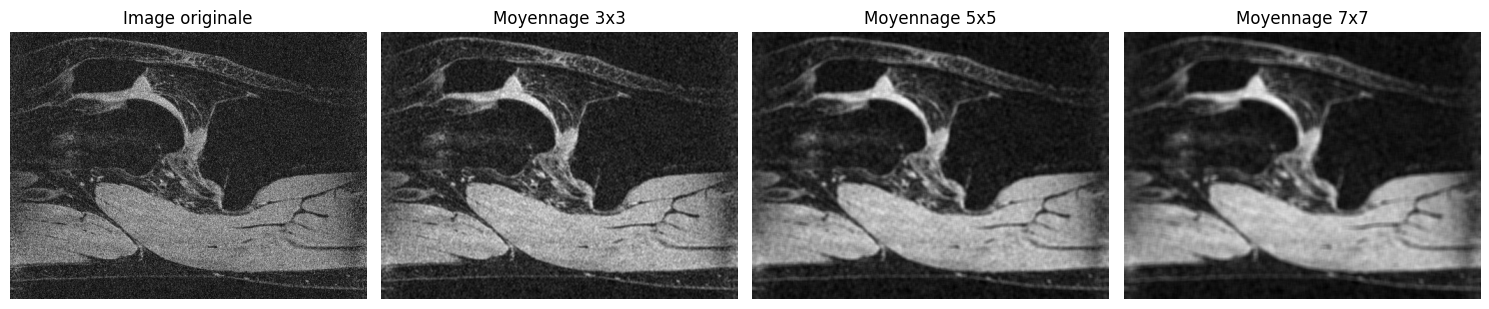

Moyenne du bruit résiduel (3x3) : 3787.69
Erreur quadratique moyenne (3x3) : 23412166.00

Moyenne du bruit résiduel (5x5) : 4177.38
Erreur quadratique moyenne (5x5) : 28640330.00

Moyenne du bruit résiduel (7x7) : 4369.75
Erreur quadratique moyenne (7x7) : 31566368.00



In [11]:
# Moyennage simple.

ks = [3, 5, 7]
blur_results = {}

# Calcul des images filtrées
for k in ks:
    blur_results[k] = cv2.blur(img, (k, k))

# Affichage
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Image originale")
plt.axis('off')

for i, k in enumerate(ks):
    plt.subplot(1, 4, i + 2)
    plt.imshow(blur_results[k], cmap='gray')
    plt.title(f"Moyennage {k}x{k}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Calcul du bruit résiduel et de l'erreur quadratique
for k in ks:
    bruit = calcul_bruit_residuel(img, blur_results[k])
    erreur = calcul_erreur_quadratique(img, blur_results[k])

    print(f"Moyenne du bruit résiduel ({k}x{k}) : {np.mean(bruit):.2f}")
    print(f"Erreur quadratique moyenne ({k}x{k}) : {erreur:.2f}\n")


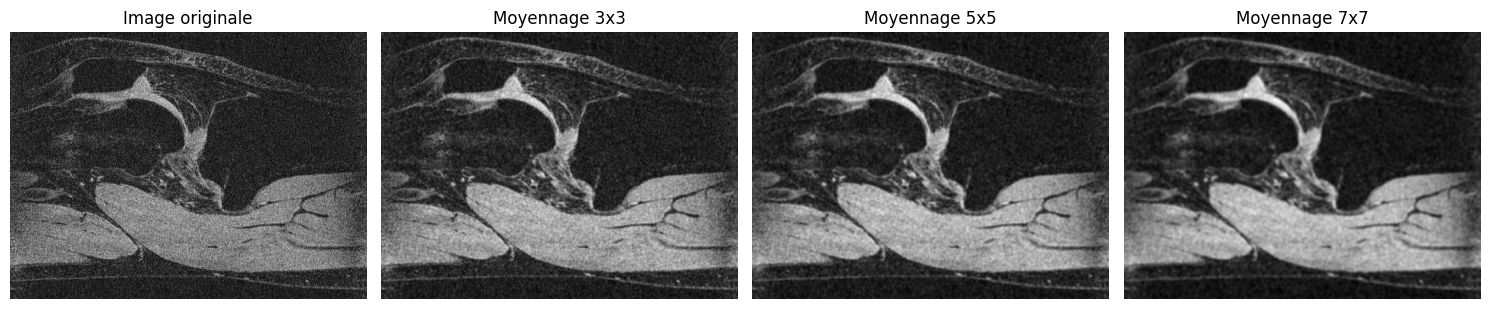

Moyenne du bruit résiduel (3x3) : 3152.47
Erreur quadratique moyenne (3x3) : 16211624.00

Moyenne du bruit résiduel (5x5) : 3616.42
Erreur quadratique moyenne (5x5) : 21361334.00

Moyenne du bruit résiduel (7x7) : 3931.18
Erreur quadratique moyenne (7x7) : 25297802.00



In [12]:
# Moyennage pondéré gaussien

ks = [3, 5, 7]
gaussian_filtered_im = {}

# Calcul des images filtrées
for k in ks:
    gaussian_filtered_im[k] = cv2.GaussianBlur(img, (k, k), 0)

# Affichage
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Image originale")
plt.axis('off')

for i, k in enumerate(ks):
    plt.subplot(1, 4, i + 2)
    plt.imshow( gaussian_filtered_im[k], cmap='gray')
    plt.title(f"Moyennage {k}x{k}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Calcul du bruit résiduel et de l'erreur quadratique
for k in ks:
    bruit = calcul_bruit_residuel(img,  gaussian_filtered_im[k])
    erreur = calcul_erreur_quadratique(img,  gaussian_filtered_im[k])

    print(f"Moyenne du bruit résiduel ({k}x{k}) : {np.mean(bruit):.2f}")
    print(f"Erreur quadratique moyenne ({k}x{k}) : {erreur:.2f}\n")


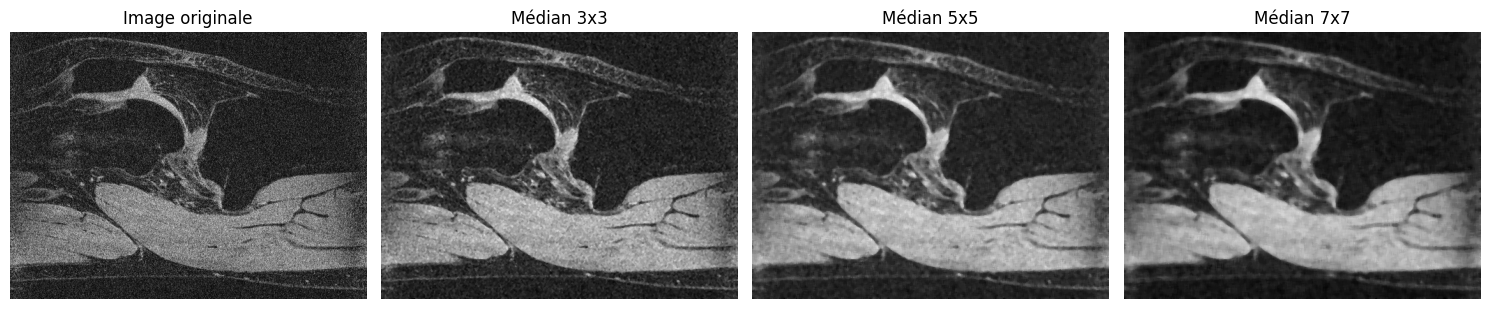

Moyenne du bruit résiduel (3x3) : 3597.32
Erreur quadratique moyenne (3x3) : 24492384.00

Moyenne du bruit résiduel (5x5) : 4061.86
Erreur quadratique moyenne (5x5) : 28816834.00

Moyenne du bruit résiduel (7x7) : 4261.38
Erreur quadratique moyenne (7x7) : 31294656.00



In [13]:
#Médian
ks = [3, 5, 7]
median_results = {}

#Conversion temporaire en uint8
mn = float(np.min(img))
mx = float(np.max(img))
img_u8 = ((img.astype(np.float32) - mn) * 255.0 / (mx - mn + 1e-9)).astype(np.uint8)


for k in ks:
    out_u8 = cv2.medianBlur(img_u8, k)

    # Retour à l'échelle originale et dtype original
    out = (out_u8.astype(np.float32) / 255.0) * (mx - mn) + mn
    out = out.astype(img.dtype)

    median_results[k] = out

# Affichage
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Image originale")
plt.axis('off')

for i, k in enumerate(ks):
    plt.subplot(1, 4, i + 2)
    plt.imshow(median_results[k], cmap='gray')
    plt.title(f"Médian {k}x{k}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Calcul du bruit résiduel et de l'erreur quadratique
for k in ks:
    bruit = calcul_bruit_residuel(img, median_results[k])
    err = calcul_erreur_quadratique(img, median_results[k])

    print(f"Moyenne du bruit résiduel ({k}x{k}) : {np.mean(bruit):.2f}")
    print(f"Erreur quadratique moyenne ({k}x{k}) : {err:.2f}\n")

<div class="alert alert-block alert-success">
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE RÉPONSE

Les résultats indiquent que la qualité du débruitage sur l’image IRM dépend à la fois du type de filtre choisi (moyennage simple, moyennage gaussien, filtrage médian) et de la taille du masque (3×3, 5×5, 7×7). En pratique, ces deux paramètres modifient le niveau de réduction du bruit et la conservation des détails, ce qui conduit à des rendus sensiblement différents selon les réglages.

En général, plus la taille du masque augmente, plus le bruit diminue. On l’observe à l’œil nu, car l’image filtrée paraît plus lisse. Cette réduction du bruit entraîne en contrepartie une diminution progressive des détails et une baisse de la netteté des contours, effet particulièrement visible avec des masques de taille 7×7. Cette observation concorde avec la hausse de la moyenne du bruit résiduel et de l’erreur quadratique moyenne : ces deux mesures montrent que, à mesure que le filtrage se renforce, l’image obtenue s’écarte davantage de l’image originale.

Le moyennage simple revient à appliquer un lissage uniforme : il atténue le bruit, mais il floute nettement les contours, surtout quand on utilise des masques 5×5 et 7×7. Avec ce filtre, les structures fines du genou deviennent moins nettes.

Dans ce contexte, le filtre gaussien, en s’appuyant sur une pondération spatiale, permet en général de réduire le bruit tout en limitant la perte d’information au niveau des contours. Par rapport à un moyennage simple, le flou obtenu se met en place de façon plus graduelle, ce qui permet de mieux conserver les transitions d’intensité. Pour une taille de masque identique, les valeurs du bruit résiduel et de l’erreur quadratique moyenne sont inférieures à celles obtenues avec un moyennage simple, ce qui va dans le sens d’un comportement plus équilibré pour ce type d’image IRM.

Le filtrage médian se distingue des approches linéaires, car il repose sur un traitement non linéaire du signal. Cette approche conserve mieux les contours et certaines structures fines, surtout lorsque l’on travaille avec des masques 3×3 et 5×5. Quand on augmente la taille du masque à 7×7, le filtrage devient plus fort. On observe alors une perte de détails, ainsi qu’une hausse du bruit résiduel et de l’erreur quadratique moyenne.

Pour conclure, ces résultats montrent le compromis classique entre la réduction du bruit et la préservation des détails.Pour l’image IRM analysée, l’application d’un filtre gaussien avec un masque de taille intermédiaire (5×5) constitue un compromis pertinent : le bruit est nettement atténué tout en maintenant des contours suffisamment lisibles pour l’interprétation.Le filtre médian est utile quand on veut conserver les contours. À l’inverse, le moyennage simple a tendance à lisser davantage l’image, ce qui entraîne plus facilement du flou et une perte de détails fins.

## 3. Amélioration d’images (6 pts)

Le fichier Lune.tif contient une image de la lune de qualité médiocre, tant du point de
vue de la distribution des niveaux de gris que de la netteté. Le but de cette question est
donc d’appliquer une succession de traitements pour améliorer la qualité de cette image.

### 3.1. Transformations portant sur l’intensité (2 pts)
<div class="alert alert-block alert-warning">

En vous basant sur l’histogramme, effectuez une ou plusieurs transformations portant sur
l’intensité de l’image pour en améliorer le contraste et l’aspect visuel. Quelques
transformations que vous pouvez essayer pour améliorer le contraste sont :

| Transformation | Paramètre(s) | Équation |
| --- | --- | --- |
| Inversion | NA | 1 – 𝑟 |
|Gamma |   𝛾 < 1 si sous-exposé <br/> 𝛾 > 1 si surexposé | 𝑟<sup>𝛾</sup> |
| Logarithme | NA | ln(1 + 𝑟) /ln(2) |
| Exponentielle | NA | 𝑒<sup>𝑟𝑙𝑛(2)</sup> − 1|

<center> ** r correspond à la valeur d’un pixel dans l’image </center>

<b>Note</b> : Il n’est pas conseillé de procéder à l’égalisation de l’histogramme à cette étape-ci.
Expliquez votre choix de transformation que vous avez utilisé pour améliorer l’aspect
visuel de l’image.

</div>

In [15]:
# Inscrivez votre code ici
from google.colab import files
uploaded = files.upload()

Saving Lune.tif to Lune.tif


shape: (540, 466) dtype: uint8 min: 0 max: 64


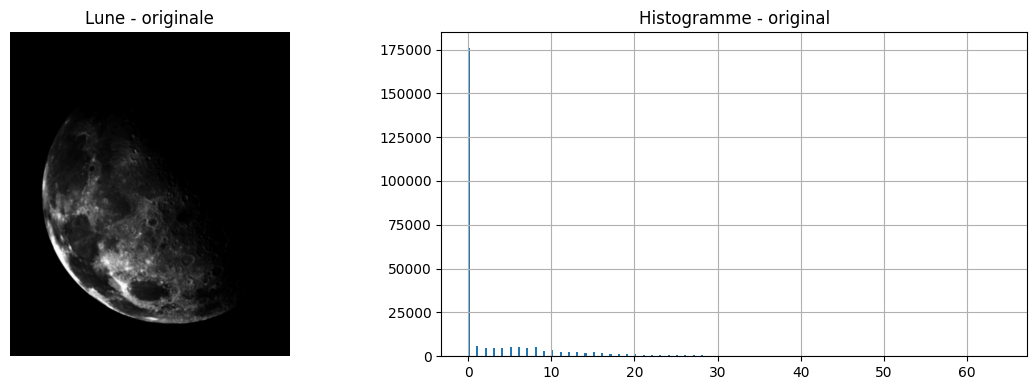

In [16]:
im = cv2.imread('/content/Lune.tif')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
print("shape:", im.shape, "dtype:", im.dtype, "min:", im.min(), "max:", im.max())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(im, cmap='gray')
plt.title("Lune - originale")
plt.axis('off')

plt.subplot(1,2,2)
plt.hist(im.ravel(), bins=256)
plt.title("Histogramme - original")
plt.grid(True)
plt.tight_layout()
plt.show()


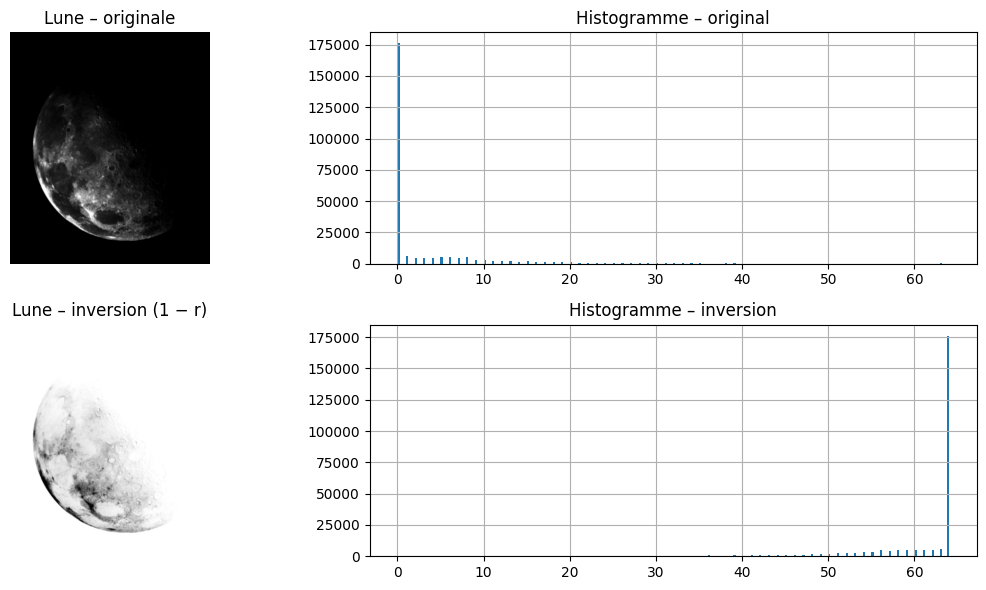

In [17]:
# Normalisation
im_norm = im.astype(np.float32)
mn, mx = im_norm.min(), im_norm.max()
r = (im_norm - mn) / (mx - mn + 1e-9)

# Inversion
im_inv01 = 1.0 - r

# Retour à l’échelle originale
im_inv = (im_inv01 * (mx - mn) + mn).astype(im.dtype)

# Affichage image et histogramme
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(im, cmap='gray')
plt.title("Lune – originale")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(im.ravel(), bins=256)
plt.title("Histogramme – original")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.imshow(im_inv, cmap='gray')
plt.title("Lune – inversion (1 − r)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(im_inv.ravel(), bins=256)
plt.title("Histogramme – inversion")
plt.grid(True)

plt.tight_layout()
plt.show()

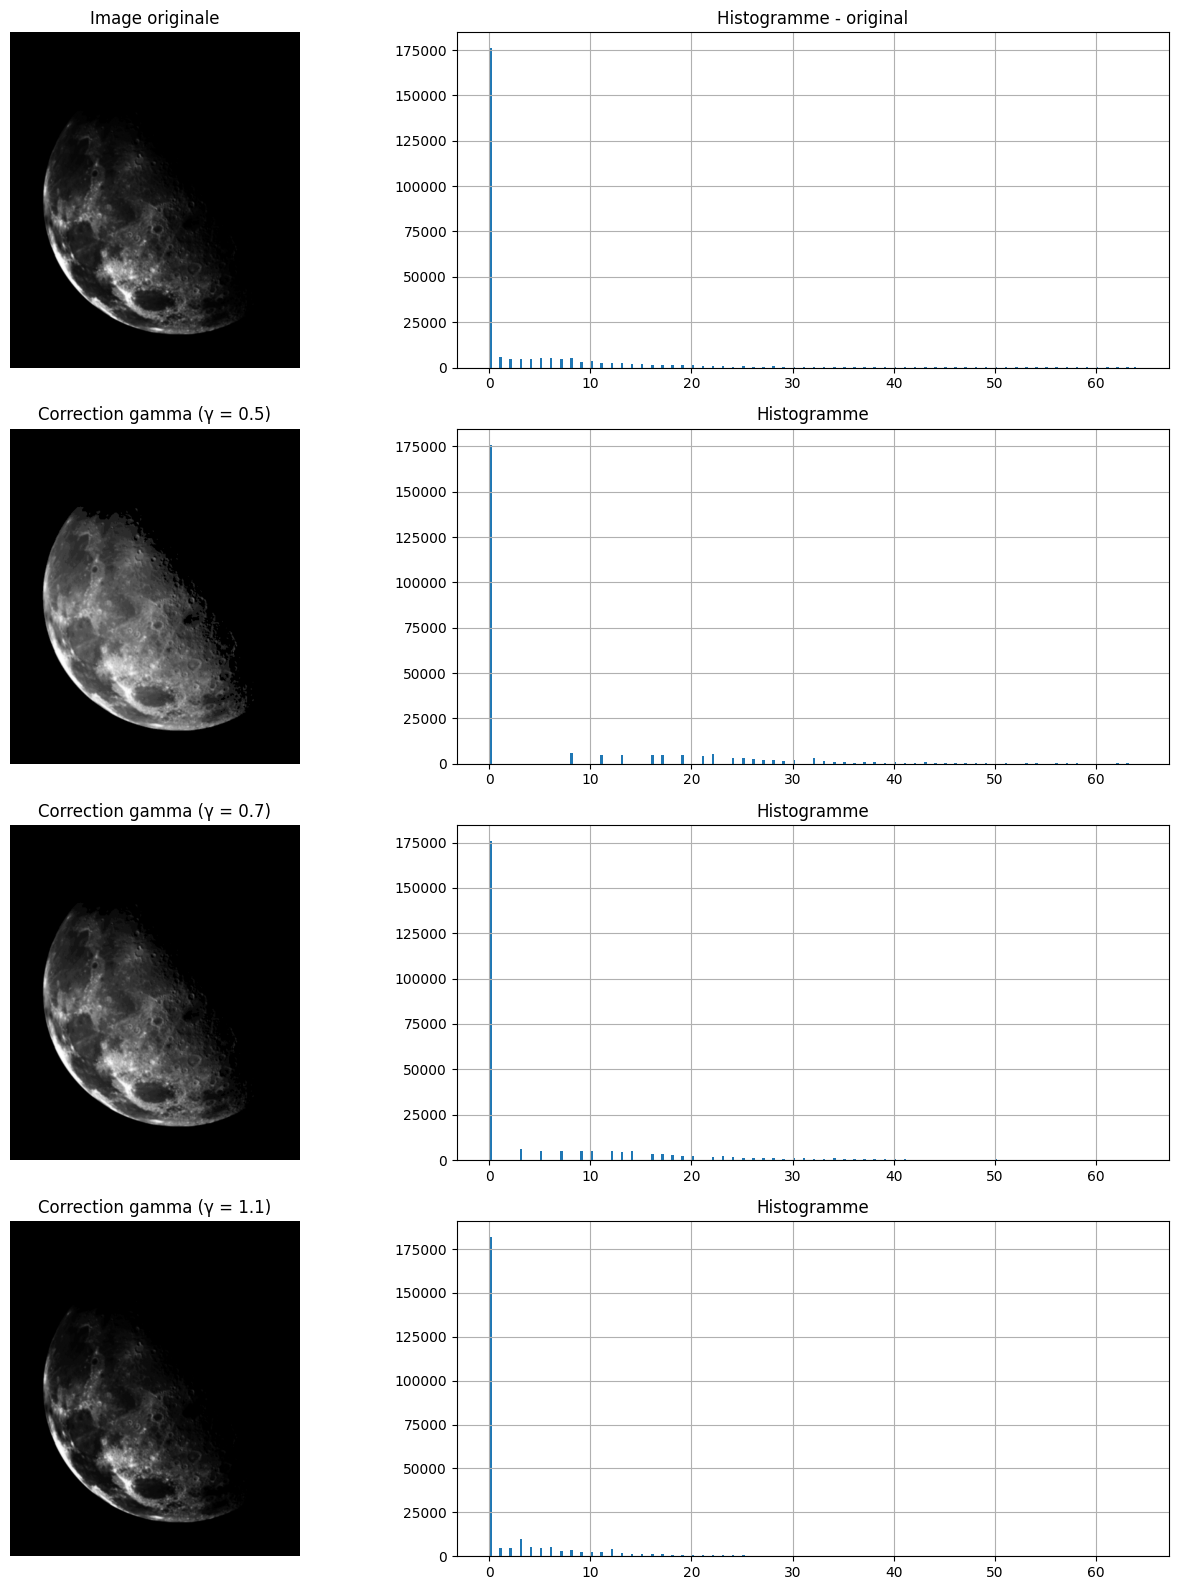

In [19]:
# Gamma
def to_float01(img):
    img = img.astype(np.float32)
    mn, mx = img.min(), img.max()
    return (img - mn) / (mx - mn + 1e-9), mn, mx

def back_to_dtype(img01, mn, mx, dtype):
    out = img01 * (mx - mn) + mn
    return np.clip(out, mn, mx).astype(dtype)

r, mn, mx = to_float01(im)

# Valeurs de gamma à comparer
gammas = [0.5, 0.7, 1.1]
# Normalisation
im_norm = im.astype(np.float32)
mn, mx = im_norm.min(), im_norm.max()
r = (im_norm - mn) / (mx - mn + 1e-9)

n_rows = 1 + len(gammas)
plt.figure(figsize=(14, 4 * n_rows))

# Original
plt.subplot(n_rows, 2, 1)
plt.imshow(im, cmap='gray')
plt.title("Image originale")
plt.axis('off')

plt.subplot(n_rows, 2, 2)
plt.hist(im.ravel(), bins=256)
plt.title("Histogramme - original")
plt.grid(True)

# Transformations gamma
for i, g in enumerate(gammas):
    im_gamma = back_to_dtype(r ** g, mn, mx, im.dtype)

    plt.subplot(n_rows, 2, 2*(i+1) + 1)
    plt.imshow(im_gamma, cmap='gray')
    plt.title(f"Correction gamma (γ = {g})")
    plt.axis('off')

    plt.subplot(n_rows, 2, 2*(i+1) + 2)
    plt.hist(im_gamma.ravel(), bins=256)
    plt.title("Histogramme")
    plt.grid(True)

plt.tight_layout()
plt.show()



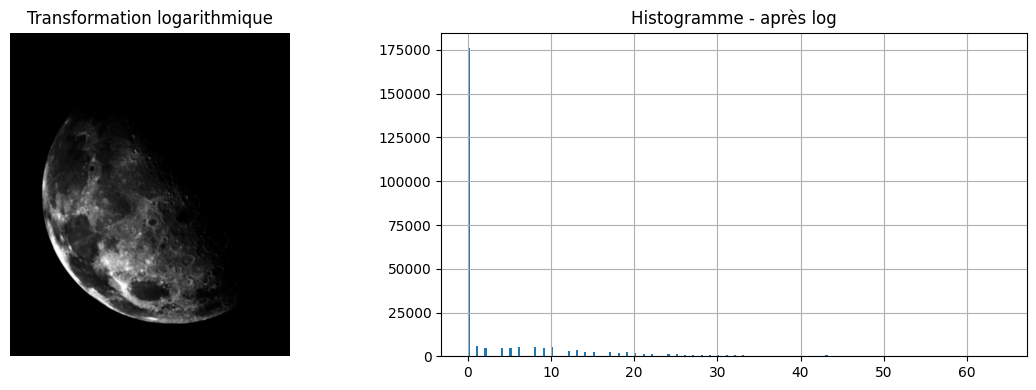

In [21]:
# Transformation logarithmique
r_log = np.log(1 + r) / np.log(2)   # ln(1+r)/ln(2)
im_log = back_to_dtype(r_log, mn, mx, im.dtype)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(im_log, cmap='gray')
plt.title("Transformation logarithmique")
plt.axis('off')

plt.subplot(1,2,2)
plt.hist(im_log.ravel(), bins=256)
plt.title("Histogramme - après log")
plt.grid(True)
plt.tight_layout()
plt.show()


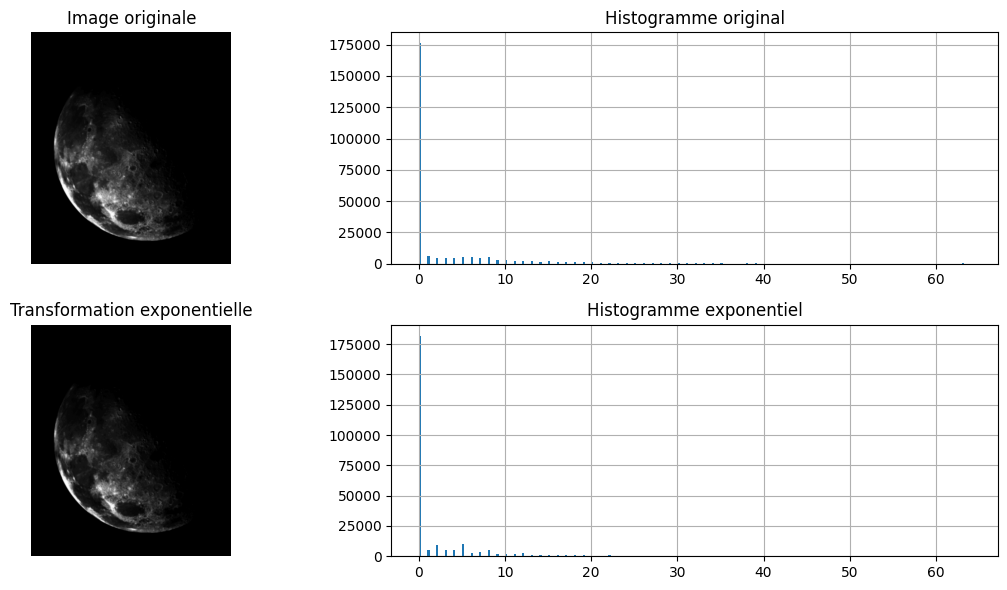

In [22]:
# Transformation exponentielle
# Normalisation de l'image originale
img_norm = im.astype(np.float32)
mn, mx = img_norm.min(), img_norm.max()
r = (img_norm - mn) / (mx - mn + 1e-9)

# Transformation exponentielle demandée
im_exp = np.exp(r * np.log(2)) - 1

# Remise dans le type et l'échelle d'origine
im_exp = im_exp / im_exp.max()
im_exp = im_exp * (mx - mn) + mn
im_exp = im_exp.astype(im.dtype)

# Affichage image et de histogramme
plt.figure(figsize=(12, 6))

# Image originale
plt.subplot(2, 2, 1)
plt.imshow(im, cmap='gray')
plt.title("Image originale")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(im.ravel(), bins=256)
plt.title("Histogramme original")
plt.grid(True)

# Image exponentielle
plt.subplot(2, 2, 3)
plt.imshow(im_exp, cmap='gray')
plt.title("Transformation exponentielle")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(im_exp.ravel(), bins=256)
plt.title("Histogramme exponentiel")
plt.grid(True)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE RÉPONSE

L’histogramme associé à l’image originale de la Lune indique que la plupart des niveaux de gris se situent dans la zone des faibles intensités, ce qui traduit une image globalement sombre avec peu de valeurs élevées.L’image présente une luminance globalement faible, avec des valeurs situées entre 0 et environ 60. Cette plage réduite limite le contraste et rend certains détails de la surface lunaire difficiles à distinguer.

Le choix des transformations d’intensité s’appuie sur l’étude de l’histogramme de l’image d’origine, qui indique que la majorité des niveaux de gris se trouvent dans les basses intensités.Cette distribution suggère que l’image est plutôt sombre, donc sous-exposée, et que le contraste reste faible. Dans ces conditions, une partie des détails de la surface lunaire n’apparaît pas clairement. À cette étape, l’égalisation de l’histogramme n’a pas été appliquée, conformément aux consignes de l’énoncé. Cette opération peut en effet modifier de manière marquée la répartition des niveaux de gris, créer un contraste peu naturel et accentuer certaines irrégularités présentes dans l’image. Parmi celles-ci, la correction gamma avec γ < 1 (γ = 0.5) s’avère la plus adaptée ici, car elle rehausse efficacement les faibles intensités (zones sombres) sans saturer excessivement les zones déjà lumineuses. On obtient une image plus claire et plus proche d’un rendu naturel : les détails ressortent mieux, tout en gardant une cohérence entre les différents niveaux de gris.

### 3.2. Affinage de l’image (2 pts)
<div class="alert alert-block alert-warning">


Appliquez à l’image obtenue à la question précédente un rehaussement par masquage flou
généralisé (Unsharp Filter / Masking en anglais). Ce filtre de convolution est défini par

<center> 𝐺 = 𝐹 + 𝑎 [ 𝐹 − ℎ<sub>𝑏</sub> ∗ 𝐹 ] = 𝐹 + 𝑎 [ 𝐹 − 𝐹′ ] </center>

où F est l’image originale, G est l’image rehaussée, hb est un noyau de convolution agissant
comme un filtre passe-bas, * est un produit de convolution, a est le coefficient de
rehaussement et b contrôle la taille du filtre adoucisseur. Utilisez le filtre par moyennage
pondéré de type Gaussien développé à la question précédente pour calculer l’image floue
𝐹′ = ℎ<sub>𝑏</sub> ∗ 𝐹.

Faites varier la taille du filtre adoucisseur et le coefficient de rehaussement. Qu’observezvous ? Décrivez l’effet de ces paramètres sur l’image rehaussée.
</div>

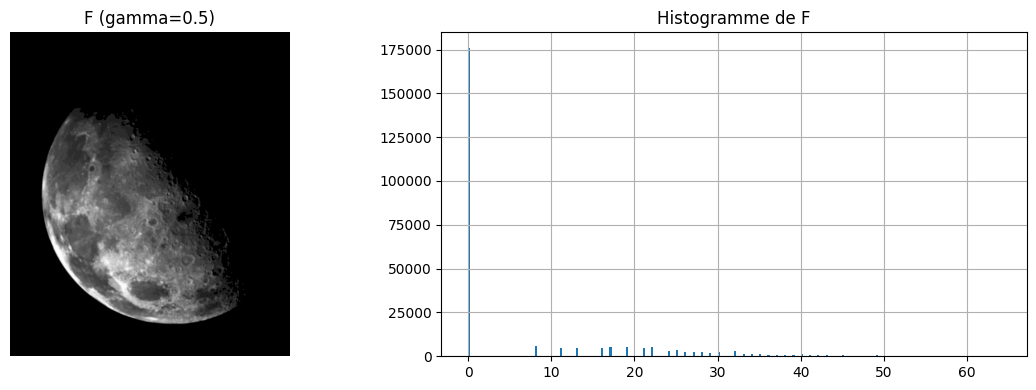

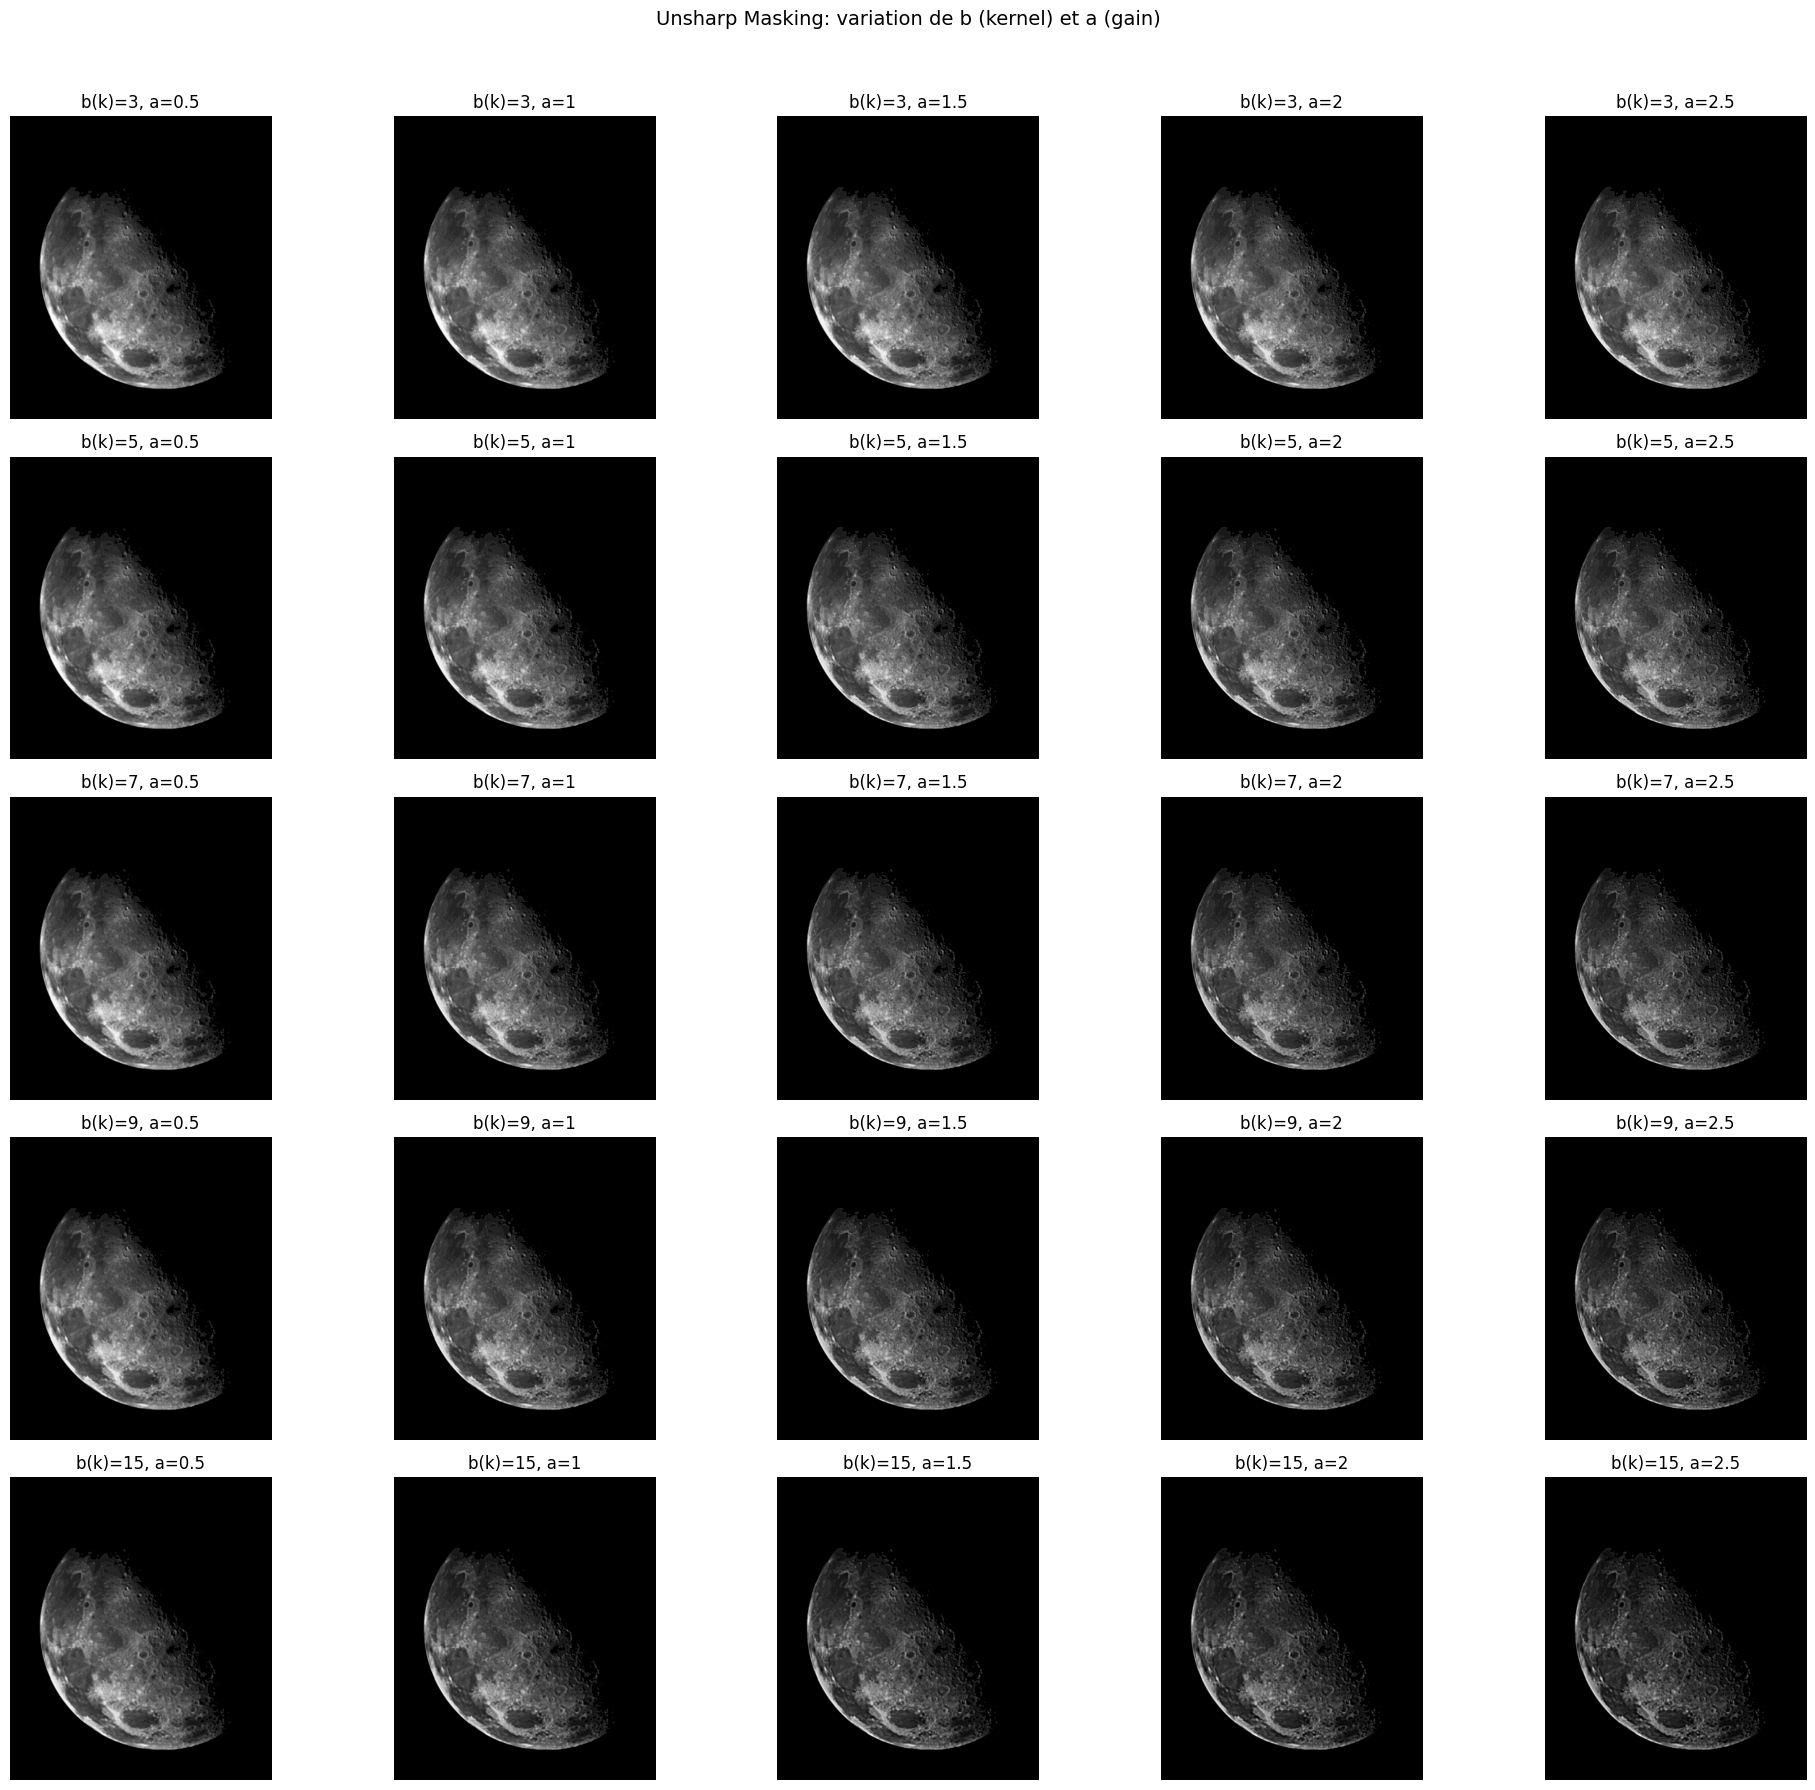

In [24]:
#Normalisation de l’image dans l’intervalle [0, 1]
r, mn, mx = to_float01(im)

gamma_meilleur = 0.5
F_uint = back_to_dtype(r ** gamma_meilleur, mn, mx, im.dtype)  # image gamma
F = F_uint.astype(np.float32)  # F en float pour calcul

# Fonction Unsharp
def unsharp(F_float, kernel_size=5, a=1.5, sigma=0):
    # kernel_size doit être impair
    if kernel_size % 2 == 0:
        kernel_size += 1

    F_prime = cv2.GaussianBlur(F_float, (kernel_size, kernel_size), sigma)  # F'
    mask = F_float - F_prime
    G = F_float + a * mask

    # clip et conversion uint8
    G = np.clip(G, 0, 255).astype(np.uint8)
    return G, F_prime, mask

#Affichage de référence : F et son histogramme
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(F_uint, cmap="gray")
plt.title(f"F (gamma={gamma_meilleur})")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.hist(F_uint.ravel(), bins=256)
plt.title("Histogramme de F")
plt.grid(True)

plt.tight_layout()
plt.show()

# b (kernel_size) et a
kernel_list = [3,5,7,9,15]  # b = taille du flou gaussien
a_list      = [0.5, 1, 1.5, 2, 2.5]   # a = coefficient de rehaussement

plt.figure(figsize=(4 * len(a_list), 3.5 * len(kernel_list)))
idx = 1

for k in kernel_list:
    for a in a_list:
        G, _, _ = unsharp(F, kernel_size=k, a=a, sigma=0)

        plt.subplot(len(kernel_list), len(a_list), idx)
        plt.imshow(G, cmap="gray")
        plt.title(f"b(k)={k}, a={a}")
        plt.axis("off")
        idx += 1

plt.suptitle("Unsharp Masking: variation de b (kernel) et a (gain)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()



Quand le coefficient de rehaussement augmente, l’image se précise peu à peu : les contours et les détails de surface de la Lune ressortent davantage. Pour de faibles valeurs (a = 0.5), l’effet reste discret. À mesure que a augmente (a ≈ 1.5–2), les détails sont mieux visibles sans trop d’artefacts. En revanche, pour des valeurs plus élevées (a ≥ 2.5), le bruit est amplifié et certains contours deviennent trop marqués, ce qui peut dégrader la qualité visuelle.

La taille du filtre adoucisseur b (kernel) contrôle l’échelle des structures renforcées. Un petit noyau (b = 3) agit principalement sur les détails fins, mais accentue aussi le bruit. Lorsque b augmente (b = 7 ou 9), l’accentuation devient plus homogène et met en valeur les structures principales. Pour un noyau très grand (b = 15), l’effet peut générer des halos autour des contours et une perte de naturel.

Ainsi, les résultats les plus satisfaisants sont obtenus avec des valeurs intermédiaires de b (5 à 9) associées à un a modéré (environ 1 à 2). Cette combinaison offre un compromis cohérent entre la netteté, la restitution des détails et la limitation des artefacts.

### 3.3. Égalisation d’histogramme (2 pts)
<div class="alert alert-block alert-warning">


Appliquez une égalisation d’histogramme à une image visuellement satisfaisante obtenue
à la question précédente. Qu’observez-vous ? Expliquez. Comparez au résultat obtenu si
vous appliquez l’égalisation d’histogramme à l’image de la Lune originale sans transformer
son intensité et sans la rehausser par masquage flou. Pourquoi les résultats sont-ils
différents ?
     Vous pouvez utiliser la fonction <code>equalize_histogram(img)</code> et <code>plt.hist</code> de matplotlib.
    
</div>

In [25]:
def equalize_histogram(img):
    # Normaliser l'image de 0 à 255
    img = ((img - img.min()) / (img.max() - img.min()) * 255).astype('uint8')
    hist, bins = np.histogram(img, 256, [0,256])
    T = np.cumsum(hist) # Somme cumulée
    T = (T - T.min()) / (T.max() - T.min()) # Normalisation entre 0 et 1
    return (255 * T[img]).astype('uint8')


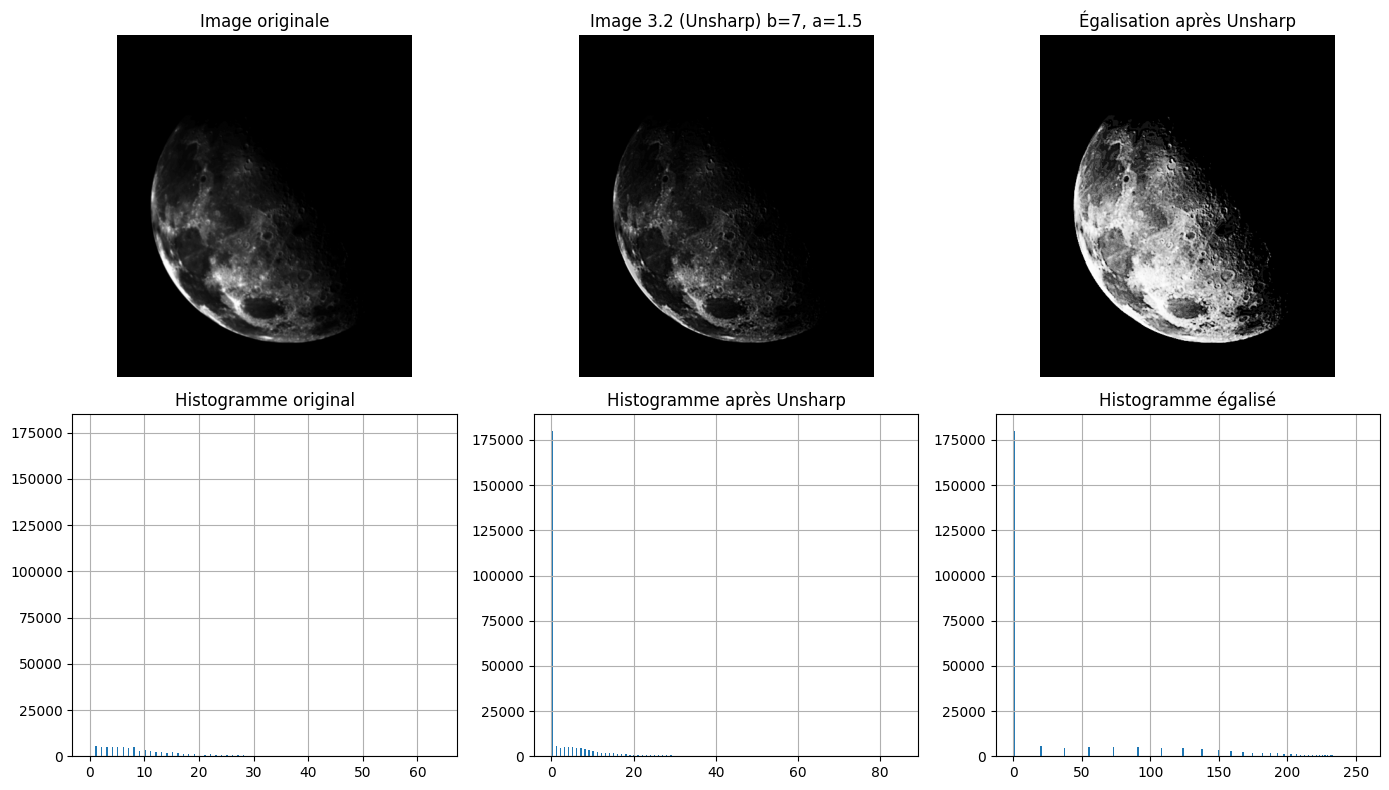

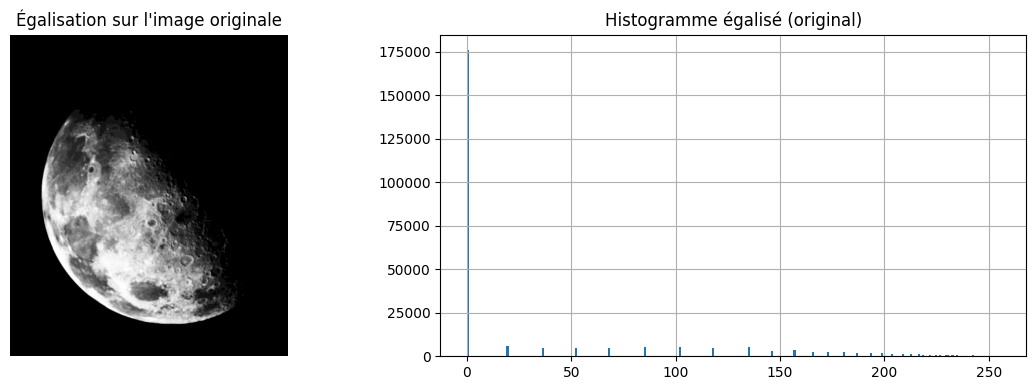

In [26]:
# Inscrivez votre code ici

# Image originale
im_color = cv2.imread('/content/Lune.tif')
im_gray = cv2.cvtColor(im_color, cv2.COLOR_BGR2GRAY)

# Image issue de 3.2 ( b=7, a=1.5)
b = 7
a = 1.5
F = im_gray.astype(np.float32)
F_blur = cv2.GaussianBlur(F, (b, b), 0)
G = np.clip(F + a * (F - F_blur), 0, 255).astype(np.uint8)

# Égalisation
im_eq_unsharp = equalize_histogram(G)
im_eq_original = equalize_histogram(im_gray)

# Affichage
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.imshow(im_gray, cmap='gray')
plt.title("Image originale")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(G, cmap='gray')
plt.title(f"Image 3.2 (Unsharp) b={b}, a={a}")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(im_eq_unsharp, cmap='gray')
plt.title("Égalisation après Unsharp")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.hist(im_gray.ravel(), bins=256)
plt.title("Histogramme original")
plt.grid(True)

plt.subplot(2, 3, 5)
plt.hist(G.ravel(), bins=256)
plt.title("Histogramme après Unsharp")
plt.grid(True)

plt.subplot(2, 3, 6)
plt.hist(im_eq_unsharp.ravel(), bins=256)
plt.title("Histogramme égalisé")
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(im_eq_original, cmap='gray')
plt.title("Égalisation sur l'image originale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(im_eq_original.ravel(), bins=256)
plt.title("Histogramme égalisé (original)")
plt.grid(True)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE RÉPONSE

Application de l’égalisation d’histogramme à l’image jugée la plus satisfaisante sur le plan visuel, obtenue à la question 3.2 . Après application du masquage flou, l’image présente une augmentation marquée du contraste global.Les niveaux de gris sont redistribués sur toute la plage dynamique [0,255], ce qui rend les détails de la surface lunaire plus visibles, notamment dans les zones initialement peu contrastées. Mais, on remarque que certaines régions deviennent très claires et l’image peut paraître moins naturelle.

Appliquée directement à l’image d’origine, l’égalisation d’histogramme tend à produire un gain de contraste plus abrupt, avec un contrôle plus limité du rendu final. Au départ, l’histogramme est très regroupé dans les faibles intensités. Après étalement, il devient beaucoup plus large, ce qui accentue excessivement certaines zones et amplifie le bruit, sans améliorer clairement la lecture des détails.

L’écart observé entre les deux résultats tient au fait que le masquage flou renforce en priorité les hautes fréquences de l’image, notamment les contours et les textures, alors que l’égalisation d’histogramme modifie l’ensemble de l’image en réajustant la distribution des niveaux d’intensité. Réaliser l’égalisation après le rehaussement conduit à un contraste mieux adapté à l’analyse que si l’on applique cette opération directement sur l’image d’origine.